# **SLIDE 8, 9 E 10 - GERANDO VARIÁVEIS ALEATÓRIAS**

## **Variável aleatória discreta**

## **Variável aleatória contínua: MÉTODO DA INVERSA**

#### Exemplo 2) Implemente uma função que gere uma variável aleatória contínua 𝑋 cuja função de distribuição acumulada é uma Exponencial de parâmetro 𝜆 = 2:

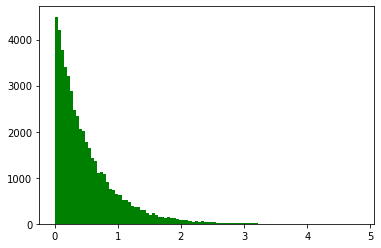

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

def exponencial(nsamples, taxa):
    X = np.zeros(nsamples) # nsamples posições com 0
    U = np.random.sample(nsamples) # nsamples valores em [0.0, 1.0)
    for i in range(nsamples):
        X[i] = - math.log(1.0 - U[i])/taxa # Inversa da exponencial
    return (X)

taxa = 2.0
nsamples = 50000
X = exponencial(nsamples, taxa)
plt.hist(X, bins=100, facecolor='green')
plt.show()

#### Exercício 1) Implemente uma função que gere uma variável aleatória contínua 𝑋 cuja função de distribuição acumulada é uma Weibull de parâmetros 𝛼 = 2 e β = 1/2

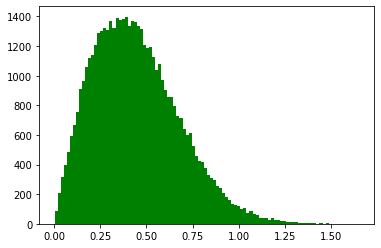

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

def weibull(nsamples, a, b):
    X = np.zeros(nsamples)
    U = np.random.sample(nsamples)
    for i in range(nsamples):
        X[i] = b * math.pow(-math.log(1 - U[i]), 1.0 / a)
    return (X)
a = 2.0
b = 0.5
nsamples = 50000
X = weibull(nsamples, a, b)
plt.hist(X, bins=100, facecolor='green')
plt.show()

## **MÉTODO POLAR**

#### Exemplo 3) Gere um par de variáveis aleatórias 𝑌 e 𝑋 com função densidade de probabilidade 𝑁𝑜𝑟𝑚𝑎𝑙 (0, 1).

4.2213308480435786e-05
0.007895258917114867


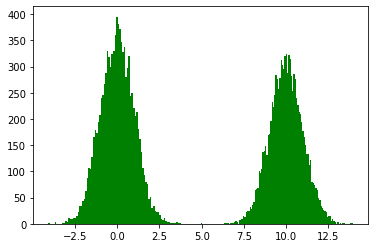

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Gera v.a. exponencial a partir da inversa da exponencial
def exponencial(nsamples, taxa):
    x = np.zeros(nsamples)
    u = np.random.sample(nsamples)
    for i in range(nsamples):
        x[i] = -math.log(1.0-u[i])/taxa
    return x

# Gera v.a. uniforme de parâmetros "a" e "b" a partir da inversa da uniforme
def uniform(nsamples, a, b):
    x = np.zeros(nsamples)
    u = np.random.sample(nsamples)
    for i in range(nsamples):
        x[i] = a + (b-a)*u[i]
    return x

def normalPolar(nsamples):
    x = np.zeros(nsamples)
    y = np.zeros(nsamples)
    d = exponencial(nsamples, 0.5)
    theta = uniform(nsamples, 0, 2*math.pi)
    for i in range(nsamples):
        r = math.sqrt(d[i])
        x[i] = r*math.cos(theta[i])
        y[i] = r*math.sin(theta[i])
    return (x, y) # retorna as duas v.a.

# par[0] contém X, par[1] contém Y
parVA = normalPolar(10000)
print(np.mean(parVA[0])); print(np.mean(parVA[1]))

plt.hist(parVA[0], bins=100, facecolor='green')
# Deslocada para a posição 10 só para mostrar na tela
plt.hist(parVA[1] + 10, bins=100, facecolor='green')
plt.show()

## **MÉTODO DA REJEIÇÃO**

#### Exemplo 1) Suponha que deseja-se gerar amostras de uma variável aleatória 𝑋 com função densidade de probabilidade Normal (0, 1). 
#### (use ℎ(𝑥) = 𝑒^-x, sendo 𝑝(𝑥) = (2/2𝜋) * 𝑒^(-x^2/2) )

0.0054562732498749655
0.9666773611091779 



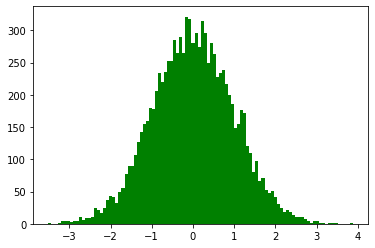

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math

def p(x):
    return (2.0/math.sqrt(2*math.pi))*math.exp((-x**2)/2)

def h(x):
    return math.exp(-x)

# Inversa da exponencial com 𝜆 = 1 usada para gerar a variável aleatória Y
def inversa_h(x):
    return -math.log(1.0-x)

def normal(nsamples):
    x = np.zeros(nsamples)
    c = math.sqrt((2*(math.exp(1)))/math.pi)
    for i in range(nsamples):
        while (True):
            u1 = np.random.sample(1)
            y = inversa_h(u1) # gera Y a partir da inversa
            u2 = np.random.sample(1)
            if (u2 <= p(y)/(c*h(y))):
                u3 = np.random.sample(1) #simetria da normal
                if (u3 < 0.5):
                    x[i] = -y
                else:
                    x[i] = y
                break
    return x

X = normal(10000)
print(np.mean(X))
print(np.var(X), '\n')
plt.hist(X, bins=100, facecolor='green')
plt.show()